# Bayesian Regression 

## Exploring the DataSet

In [151]:
import pandas as pd
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
X = pd.read_csv("BankNote_Authentication.csv")
X.head(10)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [152]:
X.shape

(1372, 5)

In [153]:
print(X['variance'].value_counts())

 0.57060    5
 0.32920    4
 0.37980    4
 0.51950    4
-2.64790    3
           ..
 3.26970    1
-0.56877    1
-4.36670    1
 4.65000    1
-3.31250    1
Name: variance, Length: 1338, dtype: int64


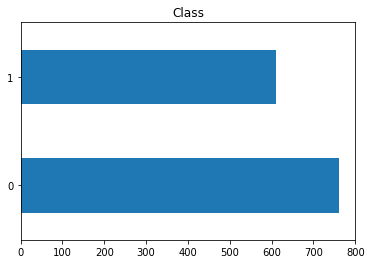

In [154]:
plt.figure() # Creates a new figure
X["class"].value_counts().plot(kind="barh", title="Class")
plt.show()

Now to create our test and training sets

# Setting up Trainging/Test Sets

In [155]:
y = X.pop("class").values

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
print(X_train.shape)
print(y_test.shape)

(1029, 4)
(343,)


In [157]:
from sklearn.linear_model import BayesianRidge, LinearRegression
import numpy as np
from scipy import stats

We will now train using the sklearn BayesianRidge method and fit

In [158]:
clf = BayesianRidge(alpha_1=1e-010, alpha_2=1e-20,fit_intercept=True, lambda_1=1e-10, normalize=True).fit(X_train, y_train)
print(clf)

BayesianRidge(alpha_1=1e-10, alpha_2=1e-20, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-10, lambda_2=1e-06, n_iter=300,
              normalize=True, tol=0.001, verbose=False)


# Graphing

We will graph our regression for some visualization, all the code in this section was copied from 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html then modified for our project

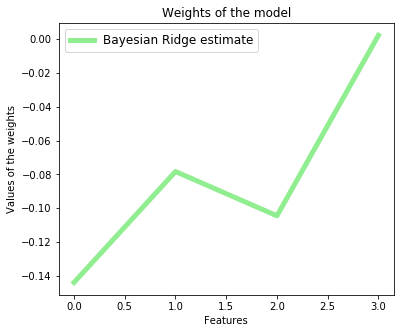

In [159]:
# this plot and the ones following were taken from https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html
ols = LinearRegression()
ols.fit(X_train, y_train)

lw = 5
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
#plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
#plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

In [160]:
n_samples, n_features = 100, 4
w = np.zeros(n_features)
lambda_ = 4

In [161]:
relevant_features = np.random.randint(0, n_features, 10)

In [162]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

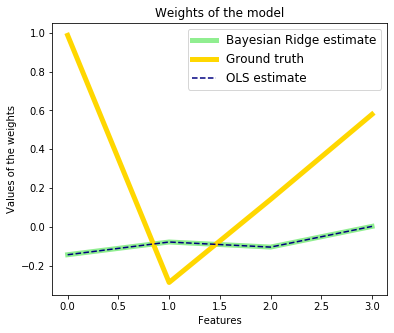

In [163]:
lw = 5
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

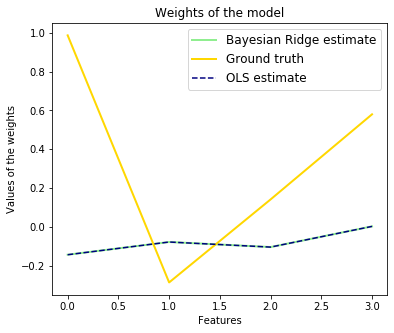

In [164]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# Results

In [165]:
predicted = clf.predict(X_test)
myList = [round(x) for x in predicted]
myList
if -0 in myList:
    print("hi")

hi


We will know define our precision and recall functions

In [166]:
def my_precision(y, pred):
    TP = 0
    FP = 0
    
    for actual, predicted in zip(y, pred):
        if(actual == predicted and predicted == 1):
            TP += 1
            
    for actual, predicted in zip(y, pred):
        if(actual != predicted and predicted == 1):
            FP += 1

    return TP/(TP+FP)

def my_recall(y, pred):
    TP = 0
    FP = 0
    
    for actual, predicted in zip(y, pred):
        if(actual == predicted and predicted == 1):
            TP += 1
            
    for actual, predicted in zip(y, pred):
        if(actual != predicted and predicted == 0):
            FP += 1
            
    return TP/(TP+FP)



In [167]:
#precision(y_test,predicted2,"1")

In [168]:
precision_recall_fscore_support(y_test, myList, average='binary')
recall=my_recall(y_test,myList)
precision=my_precision(y_test,myList)
accuracy=clf.score(X_train, y_train)
print("My recall is {}".format(recall))
print()
print("My precision is {}".format(precision))
print()
print("My accuracy is {}".format(accuracy))

My recall is 1.0

My precision is 0.9375

My accuracy is 0.8730038119062999


# Feature Ablation

We will now test feature ablation

In [169]:
X = pd.read_csv("BankNote_Authentication.csv")

y = X.pop("class").values
z = X.pop("entropy").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [170]:
clf = BayesianRidge(alpha_1=1e-010, alpha_2=1e-20,fit_intercept=True,normalize=False).fit(X_train, y_train)

In [171]:
clf.score(X_train, y_train)

0.872961783911112

In [172]:
X = pd.read_csv("BankNote_Authentication.csv")
y = X.pop("class").values
z = X.pop("variance").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
clf = BayesianRidge(alpha_1=1e-010, alpha_2=1e-20,fit_intercept=True,normalize=False).fit(X_train, y_train)
clf.score(X_train, y_train)

0.4356799502432007

In [173]:
X = pd.read_csv("BankNote_Authentication.csv")
y = X.pop("class").values
z = X.pop("skewness").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
clf = BayesianRidge(alpha_1=1e-010, alpha_2=1e-20,fit_intercept=True,normalize=False).fit(X_train, y_train)
clf.score(X_train, y_train)

0.6260904176725106

In [174]:
X = pd.read_csv("BankNote_Authentication.csv")
y = X.pop("class").values
z = X.pop("curtosis").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
clf = BayesianRidge(alpha_1=1e-010, alpha_2=1e-20,fit_intercept=True,normalize=False).fit(X_train, y_train)
clf.score(X_train, y_train)

0.5954577075674614